### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.shape

(12684, 26)

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data.car.value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [21]:
#Remove car column because sample size is so small
data.drop('car',axis=1, inplace=True)

In [18]:
data[data.CarryAway.isnull()].sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
8629,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,0,0,1,1
3137,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
3356,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
4737,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,below21,Single,...,4~8,NaN,4~8,less1,1,1,0,0,1,0
3355,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
3357,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
8612,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Female,50plus,Married partner,...,4~8,NaN,4~8,4~8,1,0,0,0,1,0
4722,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,below21,Single,...,4~8,NaN,4~8,less1,1,1,0,0,1,1


In [19]:
#Have substantial data for cheap restaurants. Keep this data
data.RestaurantLessThan20.value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [20]:
#Have substantial data. Keep it!
data.Restaurant20To50.value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [9]:
#Have substantial data. Keep it!
data.CoffeeHouse.value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [23]:
accept = data[data.Y == 1].shape[0]/data.shape[0]
accept

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [38]:
data_coupon = data.coupon.value_counts()

<Axes: >

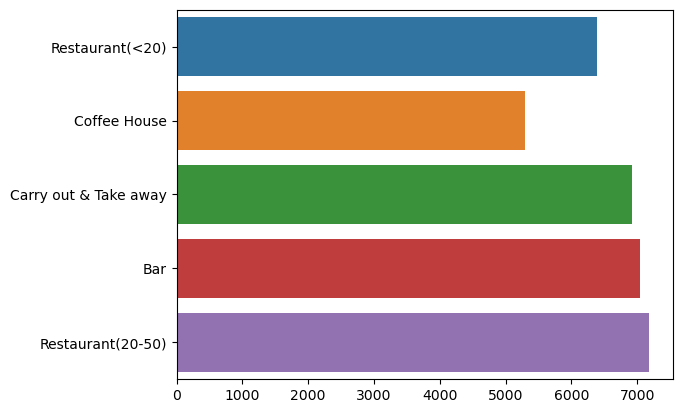

In [36]:
sns.barplot(x = data.coupon.index, y = data.coupon.values, errorbar = None)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

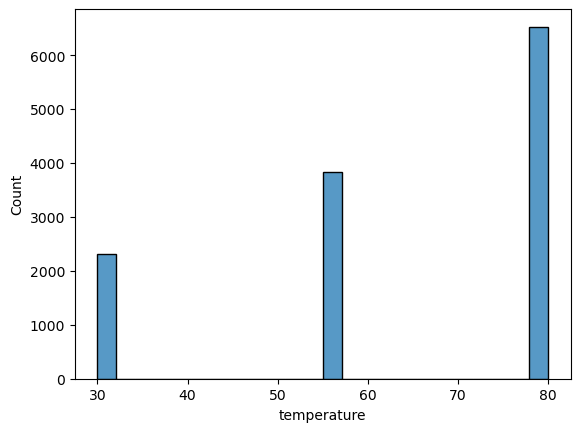

In [39]:
sns.histplot(data, x = "temperature")

In [47]:
###DEMOGRAPHIC CUTS###

less_freq = ['never','less1','1~3']
more_freq = ['4~8','gt8']

once_or_more = ['1~3','4~8','gt8']

#Passengers that are not kids
not_kids = data.passanger.unique().tolist()
not_kids.remove('Kid(s)')
not_kids.remove('Alone')

#Passengers
not_alone = data.passanger.unique().tolist()
not_alone.remove('Alone')

#Occupation that is not forestry
occ = data.occupation.unique().tolist()
occ.remove('Farming Fishing & Forestry')

#Those who are not widowed
not_widowed = data.maritalStatus.unique().tolist()
not_widowed.remove("Widowed")

#Age groups
over21 = data.age.unique().tolist()
over21.remove('below21')

over25 = data.age.unique().tolist()
over25 = [e for e in over25 if e not in ['21','below21']]

under30 = ['below21','21','26']
over30 = data.age.unique().tolist()
over30 = [i for i in over30 if i not in under30]

#Income levels
under50k = ['Less than $12500','$12500 - $24999','$37500 - $49999']
between50kand100k = ['$50000 - $62499', '$62500 - $74999', '$87500 - $99999']
over100k = ['$100000 or More']

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
df_bar = data[data.coupon == 'Bar']

2. What proportion of bar coupons were accepted?


In [30]:
acceptance_bar = {'Accepted': [df_bar[df_bar.Y == 1].shape[0] / df_bar.shape[0]],
                  'Not Accepted' : [df_bar[df_bar.Y == 0].shape[0] / df_bar.shape[0]]}
acceptance_bar = pd.DataFrame(acceptance_bar).T
acceptance_bar.columns = ['Proportion']
acceptance_bar

,Proportion
Accepted,0.410015
Not Accepted,0.589985


([<matplotlib.patches.Wedge at 0x255adf3a290>,
 [Text(0.30684087702552026, 1.0563373874791187, 'Coupon Accepted'),
  Text(-0.30684087702551993, -1.0563373874791189, 'Coupon Not Accepted')])

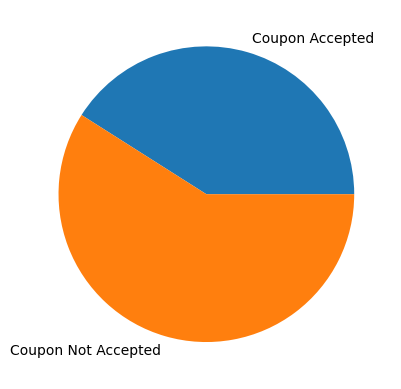

In [31]:
plt.pie(acceptance_bar.Proportion, labels = ["Coupon Accepted", "Coupon Not Accepted"])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [279]:
df_bar_less_freq = df_bar[(df_bar['Bar'].isin(less_freq))]
df_bar_more_freq = df_bar[(df_bar['Bar'].isin(more_freq))]
bar_freq = {'Less Frequent': [df_bar_less_freq.Y.sum() / df_bar_less_freq.shape[0]],
            'More Frequent': [df_bar_more_freq.Y.sum() / df_bar_more_freq.shape[0]] }
bar_freq = pd.DataFrame(bar_freq).T.reset_index()
bar_freq.columns = ['Frequency','Acceptance Rate']
bar_freq['Definition'] = ['Went to a bar 3 or fewer times a month', 'Went to bars more than 3 times a month']
bar_freq

,Frequency,Acceptance Rate,Definition
0,Less Frequent,0.370618,Went to a bar 3 or fewer times a month
1,More Frequent,0.768844,Went to bars more than 3 times a month


Text(0.5, 1.0, 'Acceptance Rate by Frequency of Attending Bars')

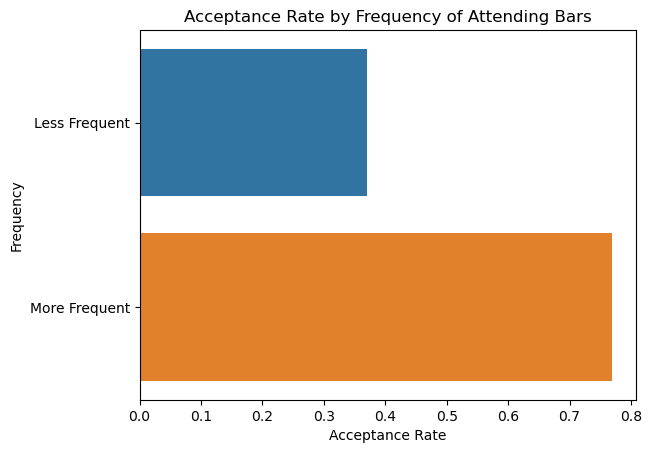

In [46]:
sns.barplot(bar_freq, x = 'Acceptance Rate', y = 'Frequency')
plt.title("Acceptance Rate by Frequency of Attending Bars")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [49]:
df_bar1  = df_bar[df_bar.Bar.isin(once_or_more)]

In [282]:
df_bar1_over25 = df_bar1[df_bar1.age.isin(over25)]
all_others = df_bar[~df_bar.Bar.isin(once_or_more) & ~df_bar.age.isin(over25)]
compare25 = {'Group': ['Drivers who go to a bar more than once a month and are over 25',
                      'All other drivers'],
            'Proportion': [df_bar1_over25.Y.sum() / df_bar1_over25.shape[0],
                           all_others.Y.sum() / all_others.shape[0]]
            }
compare25 = pd.DataFrame(compare25)
print('Acceptance rate of drivers who go to a bar more than once a month and are over 25:', 
      "{:.2f}".format(compare25.Proportion[0]))
print('Acceptance rate of other drivers:', "{:.2f}".format(compare25.Proportion[1]))

Acceptance rate of drivers who go to a bar more than once a month and are over 25: 0.70
Acceptance rate of other drivers: 0.39


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [283]:
test_group = df_bar1[(df_bar1.passanger.isin(not_kids)) & (df_bar1.occupation.isin(occ))]
test_group_rate = test_group.Y.sum() / test_group.shape[0]
all_others = df_bar[~df_bar.Bar.isin(once_or_more) & ~df_bar.passanger.isin(not_kids) & ~df_bar.occupation.isin(occ)]
all_others_rate = all_others.Y.sum() / all_others.shape[0]
print("Drivers who go to bars more than once a month, had no kids as passengers, and had occupations other than farming...:",
      "{:.2f}".format(test_group_rate))
print("Acceptance rate of all others:", all_others_rate)

Drivers who go to bars more than once a month, had no kids as passengers, and had occupations other than farming...: 0.72
Acceptance rate of all others: 0.5


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [284]:
group1 = df_bar1[(df_bar1.maritalStatus.isin(not_widowed)) & (df_bar1.passanger.isin(not_kids)) ]
group1_rate = group1.Y.sum() / group1.shape[0]
print("Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:", 
      "{:.2f}".format(group1_rate))

group2 = df_bar1[(df_bar1.age.isin(under30))]
group2_rate = group2.Y.sum() / group2.shape[0]
print("Drivers who go to bars more than once a month and are under the age of 30:", "{:.2f}".format(group2_rate))

group3 = df_bar[(df_bar.RestaurantLessThan20.isin(more_freq)) & (df_bar.income.isin(under50k))]
group3_rate = group3.Y.sum() / group3.shape[0]
print("Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:", 
      "{:.2f}".format(group3_rate))

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.72
Drivers who go to bars more than once a month and are under the age of 30: 0.72
Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.46


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

***Purpose: Look at coupon acceptance rate by coupon type, and then determine  which demographics are most likely to accept each coupon type.***

In [114]:
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [233]:
#Calculate Overall Coupon Acceptance Rate by Coupon Type
overall = {}
coupons = data.coupon.unique().tolist()
for c in coupons:
    df = data[data.coupon == c]
    accepted_num = df[df.Y==1].shape[0]
    sample_size = df.shape[0]
    proportion = accepted_num / sample_size
    overall[c] = [proportion, accepted_num, sample_size]
overall = pd.DataFrame(overall).T
overall.columns = ['Acceptance Rate','Accepted Count', 'Sample Size']
overall = overall.sort_values('Acceptance Rate', ascending = False)
overall

,Acceptance Rate,Accepted Count,Sample Size
Carry out & Take away,0.735478,1760.0,2393.0
Restaurant(<20),0.707107,1970.0,2786.0
Coffee House,0.499249,1995.0,3996.0
Restaurant(20-50),0.441019,658.0,1492.0
Bar,0.410015,827.0,2017.0


Overall, "Carry out & Take away" coupons have the highest acceptance rate, followed closely by cheap restaurants under $20. More expensive restaurants and bars have the lowest acceptance rates.

Text(0.5, 1.0, 'Acceptance Rate by Coupon Type')

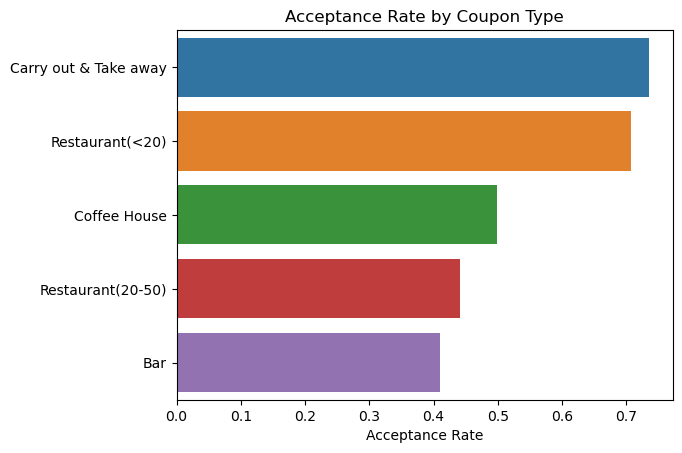

In [234]:
sns.barplot(x = overall['Acceptance Rate'], y = overall.index)
plt.title("Acceptance Rate by Coupon Type")

In [115]:
def createlistoflists(lst):
    return [[el] for el in lst]

In [186]:
#Demographic cuts and variables

demos = {'age' : [under30, over30],
        'income' : [under50k, between50kand100k, over100k],
        'maritalStatus' : createlistoflists(data.maritalStatus.unique().tolist()),
        'gender': createlistoflists(data.gender.unique().tolist()),
        'education': createlistoflists(data.education.unique().tolist()),
        'passanger': [not_alone,['Alone'],['Friend(s)'],['Partner'],['Kid(s)']],
        'occupation' : createlistoflists(data.occupation.unique().tolist()),
        'Bar' : [['never'], once_or_more, less_freq, more_freq],
        'CoffeeHouse' : [['never'], once_or_more, less_freq, more_freq],
        'CarryAway': [['never'], once_or_more, less_freq, more_freq],
        'RestaurantLessThan20': [['never'], once_or_more, less_freq, more_freq],
        'Restaurant20To50' : [['never'], once_or_more, less_freq, more_freq],
        'destination': createlistoflists(data.destination.unique().tolist()),
        'temperature': createlistoflists(data.temperature.unique().tolist()),
        'weather' : createlistoflists(data.weather.unique().tolist()),
        'time' : createlistoflists(data.time.unique().tolist()),
        'expiration' : createlistoflists(data.expiration.unique().tolist())
        }


In [187]:
#Graph-friendly description of demo cuts
demo_info = {'age' : ['Under 30', 'Over 30'],
            'income' : ['Under $50k', '$50k-$100k', '$100k+'],
            'maritalStatus' : data.maritalStatus.unique().tolist(),
            'gender': data.gender.unique().tolist(),
            'education': data.education.unique().tolist(),
            'passanger': ["Not Alone",'Alone','With Friend(s)','With Partner','With Kid(s)'],
            'occupation' : data.occupation.unique().tolist(),
            'Bar' : ['Never', "One or more times a month", "3 or fewer times a month", "More than 3 times a month"],
            'CoffeeHouse' : ['Never', "One or more times a month", "3 or fewer times a month", "More than 3 times a month"],
            'CarryAway': ['Never', "One or more times a month", "3 or fewer times a month", "More than 3 times a month"],
            'RestaurantLessThan20': ['Never', "One or more times a month", "3 or fewer times a month", "More than 3 times a month"],
            'Restaurant20To50' : ['Never', "One or more times a month", "3 or fewer times a month", "More than 3 times a month"],
            'destination': data.destination.unique().tolist(),
            'temperature': data.temperature.unique().tolist(),
            'weather' : data.weather.unique().tolist(),
            'time' : data.time.unique().tolist(),
            'expiration': data.expiration.unique().tolist()
            }

In [206]:
#Function to calculate acceptance rates, accepted count, and sample sizes by demo
def calc_accept_rate(demos, df):
    prop = {}
    size = {}
    accepted = {}
    for d in demos:
        prop[d] = []
        size[d] = []
        accepted[d] = []
        for element in demos[d]:
            accepted_num = df[df[d].isin(element) & df.Y==1].shape[0]
            sample_size = df[df[d].isin(element)].shape[0]
            acceptance_rate = accepted_num / sample_size
            prop[d].append(acceptance_rate)
            size[d].append(sample_size)
            accepted[d].append(accepted_num)
    return prop, accepted, size

In [221]:
#Function to combine dictionaries with accepted counts into a nested dictionary with a separate dataframe by demo
def combine_df(demos, proportion, accepted_num, samplesize, info):
    data_dict = {}
    for d in demos:
        demo_label = [d] * len(demos[d])
        df = pd.DataFrame(data = [demo_label, demos[d], proportion[d], accepted_num[d], samplesize[d],info[d]]).T
        df.columns = ['Demo Label','Selection','Acceptance Rate','Accepted Count','Sample Size','Demo']
        data_dict[d] = df
    return data_dict

In [222]:
#Creating nested dictionary for all coupon types
dict_all = {}
for c in coupons:
    df = data[data.coupon == c]
    rate, accepted_num, sample_size = calc_accept_rate(demos, df)
    dict_df = combine_df(demos, rate, accepted_num, sample_size, demo_info)
    dict_all[c] = dict_df

***Findings***

For all venues except expensive restaurants, coupon accepters were most likely to have friends as their passengers in the car. Those who accepted the expensive restaurant coupons were most likely to have their partner in the car.

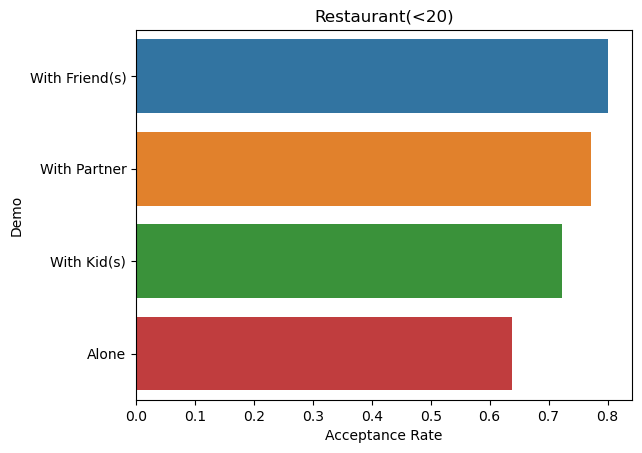

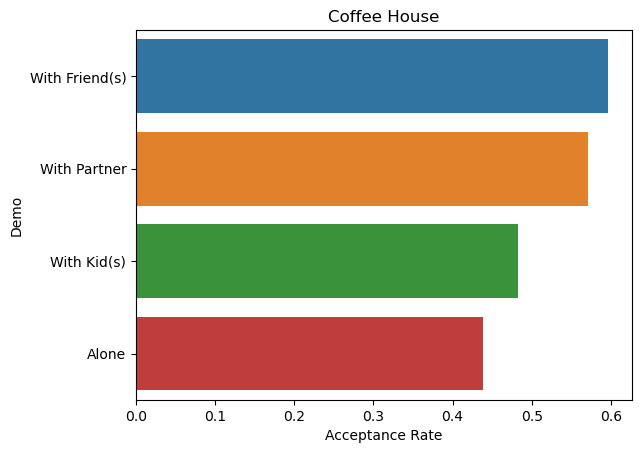

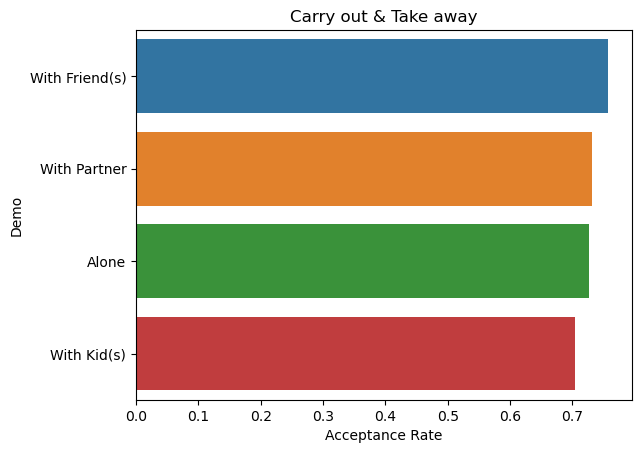

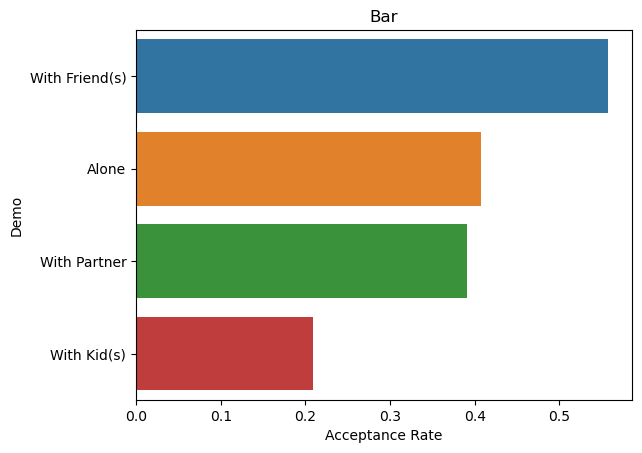

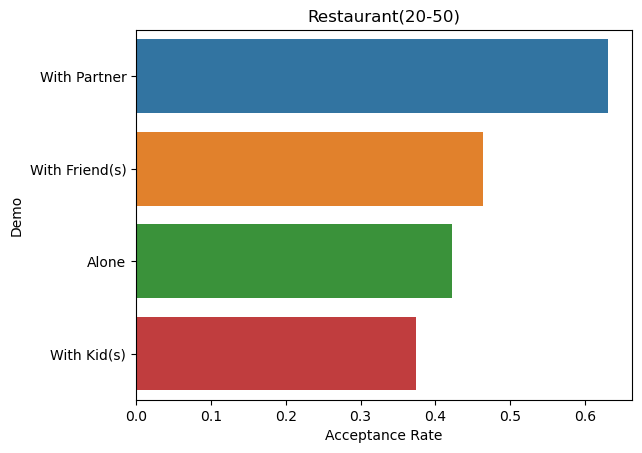

In [257]:
for c in coupons: 
    df = dict_all[c]['passanger']
    df = df[df['Demo'] != "Not Alone"].sort_values(by = 'Acceptance Rate', ascending = False)
    sns.barplot(df, x = 'Acceptance Rate', y = 'Demo')
    plt.title(c)
    plt.show()


Not surprisingly, coupons to cheap restaurants were most likely to be accepted in the evening or late afternoon, coupons to bars were most likely to be accepted at night, and coupons to coffee houses were most likely to be accepted in the morning. However, it is interesting that coupons to expensive restaurants were most likely to be accepted at 10AM, perhaps because that is the time when the biggest deals are available. 

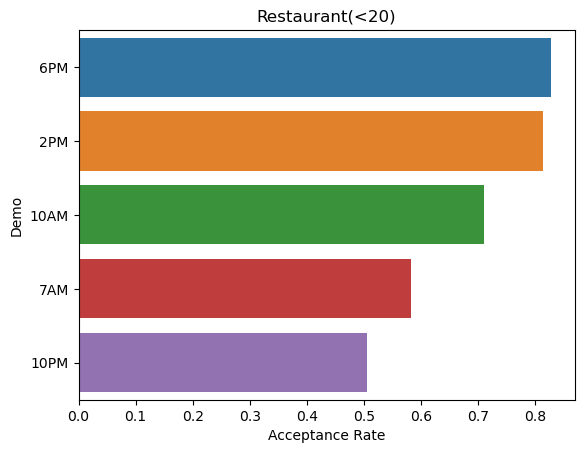

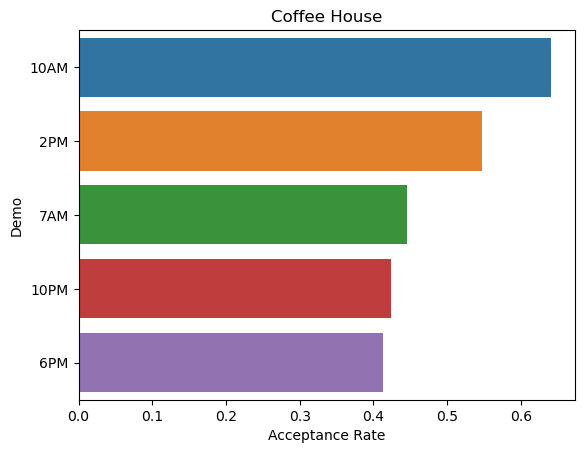

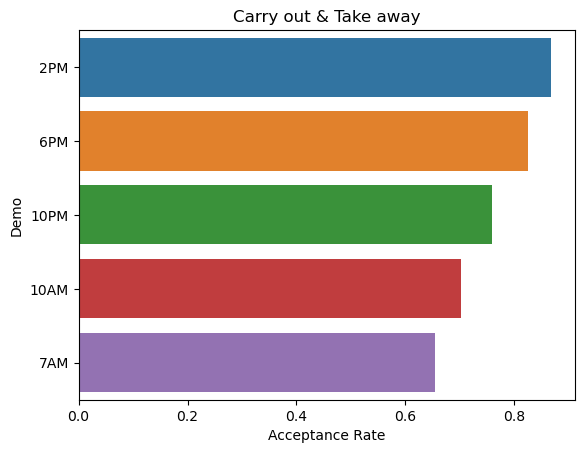

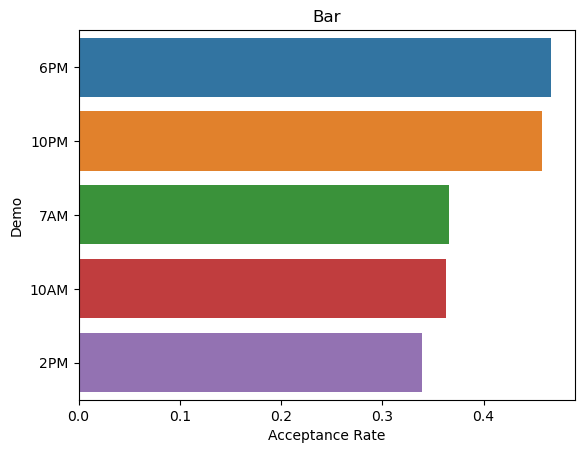

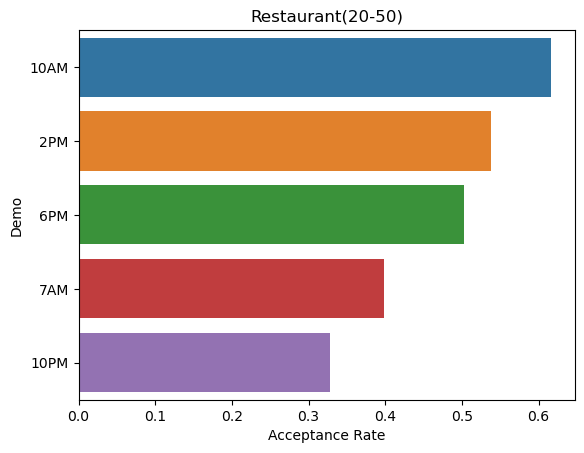

In [244]:
for c in coupons: 
    df = dict_all[c]['time']
    df = df.sort_values(by = 'Acceptance Rate', ascending = False)
    sns.barplot(df, x = 'Acceptance Rate', y = 'Demo')
    plt.title(c)
    plt.show()

For most venues, coupons are most likely to be accepted on sunny days. An interesting exception is coffee houses, where coupons are most likely to be accepted on rainy days, followed closely by sunny days. 

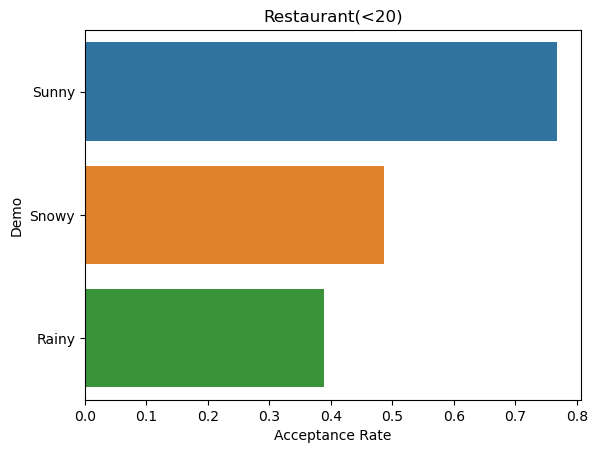

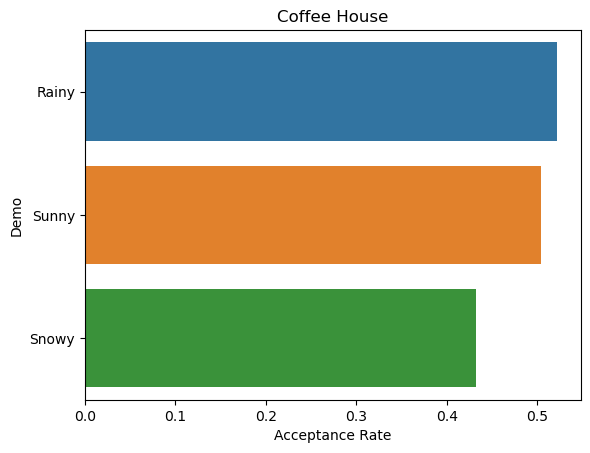

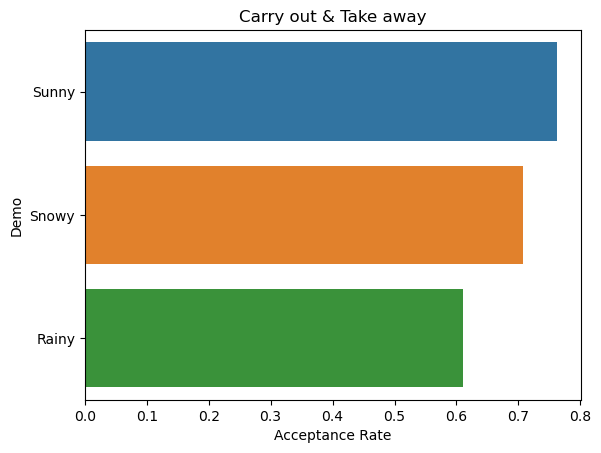

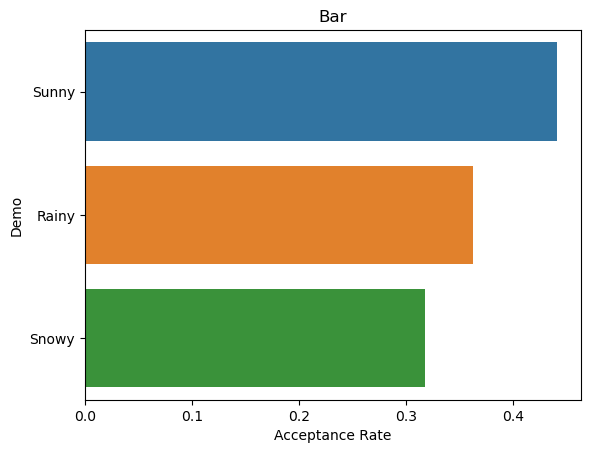

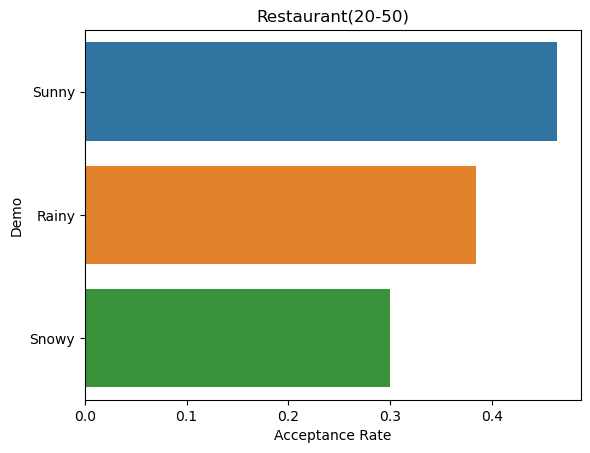

In [250]:
for c in coupons: 
    df = dict_all[c]['weather']
    df = df.sort_values(by = 'Acceptance Rate', ascending = False)
    sns.barplot(df, x = 'Acceptance Rate', y = 'Demo')
    plt.title(c)
    plt.show()

Coupons that expire in 1 day tend to have higher acceptance rates than coupons that expire in 2 hours. However, the difference between the two types is not so stark for bar coupons. 

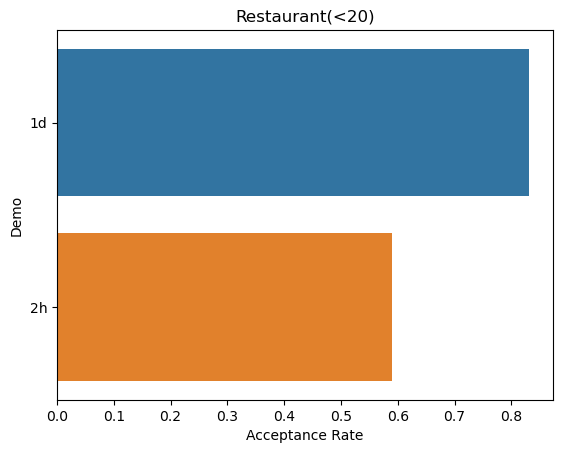

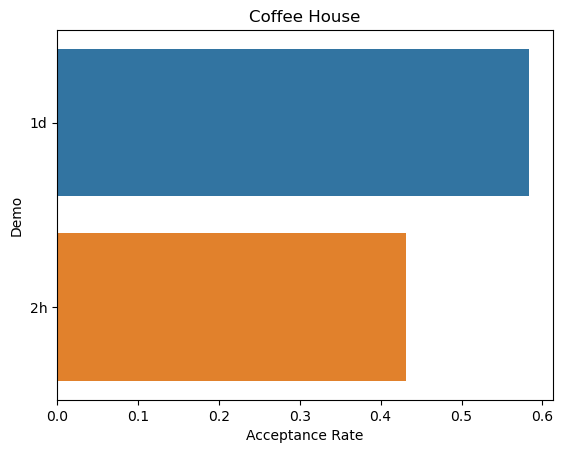

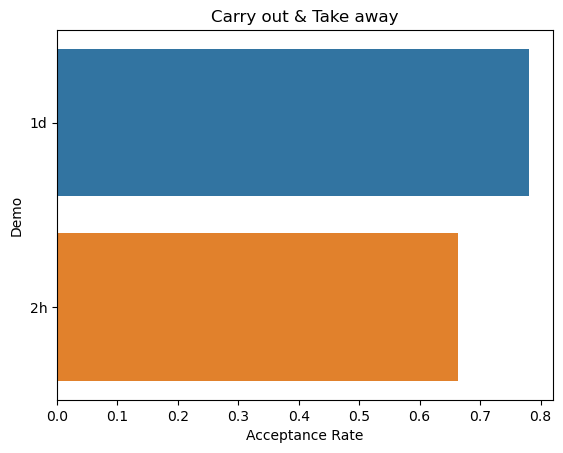

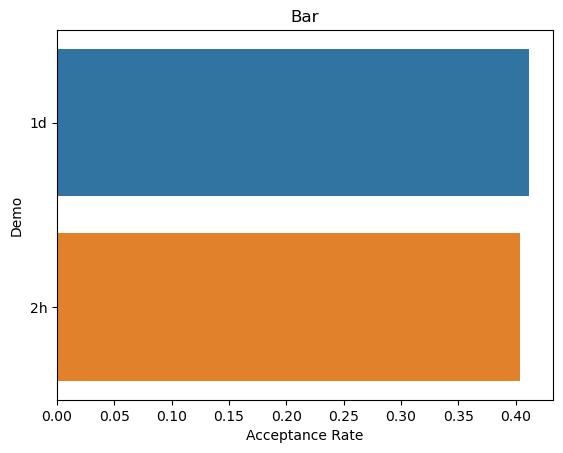

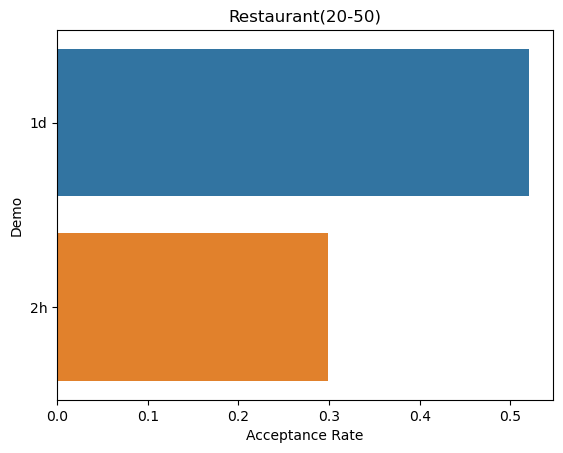

In [251]:
for c in coupons: 
    df = dict_all[c]['expiration']
    df = df.sort_values(by = 'Acceptance Rate', ascending = False)
    sns.barplot(df, x = 'Acceptance Rate', y = 'Demo')
    plt.title(c)
    plt.show()

In [269]:
dict_dfs = {}
for c in coupons: 
    df = pd.concat([dict_all[c][a] for a in list(dict_all[c].keys())], axis = 0).reset_index()
    dict_dfs[c] = df.sort_values('Acceptance Rate',ascending = False).drop('index', axis=1)

In [278]:
#Demos with the highest acceptance rates and sample sizes over 50
for c in coupons: 
    print(c.upper() + "\n")
    print(dict_dfs[c][dict_dfs[c]['Sample Size'] > 50][['Demo Label','Acceptance Rate','Demo']].head(10))
    print("\n")

RESTAURANT(<20)

     Demo Label Acceptance Rate             Demo
82   expiration         0.83161               1d
79         time         0.82754              6PM
77         time        0.813486              2PM
20    passanger        0.801453   With Friend(s)
29   occupation        0.798319  Sales & Related
68  destination        0.792541  No Urgent Place
18    passanger        0.780163        Not Alone
21    passanger        0.771318     With Partner
74      weather        0.768304            Sunny
72  temperature        0.760635               80


COFFEE HOUSE

          Demo Label Acceptance Rate                                  Demo
28        occupation        0.743243  Healthcare Practitioners & Technical
55       CoffeeHouse           0.675             More than 3 times a month
53       CoffeeHouse         0.66025             One or more times a month
78              time        0.640712                                  10AM
25        occupation        0.625251                 